# platetree usage examples

In [1]:
import pygplates
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import platetree as pt

# file paths assume local GPlates 2.0 installation on MacOS
rotation_model = pygplates.RotationModel('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
sp = pygplates.FeatureCollection('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/StaticPolygons/Muller_etal_AREPS_2016_StaticPolygons.gpmlz')


## Example #1

run code for one time snapshot and plot the results


[[514, 802], [517, 518], [518, 529, 501], [18106, 103], [520, 526], [521, 301], [522, 521], [290, 201], [525, 522], [526, 301], [173, 154], [64701, 647], [735, 614], [7701, 715], [70822, 3203], [43203, 43201], [551, 301], [554, 518], [590, 61601], [737, 678], [349, 319], [563, 677], [43102, 401], [566, 667], [8201, 817, 201], [104, 101], [607, 7250], [61501, 615], [61502, 61501], [614, 67317, 67316, 67315, 67314, 67313, 67312, 67311, 67310, 67309, 67308, 67307, 67306, 67305, 67304, 67303, 673], [580, 402, 302], [44101, 43200], [44102, 44101], [44103, 44101], [704, 702], [623, 301], [591, 61601], [7250, 7255, 7247, 7246, 7096, 401], [18105, 103], [601, 410, 401], [602, 601], [603, 604], [604, 602], [43101, 401], [606, 616], [613, 612], [608, 609], [609, 901], [611, 609], [612, 602], [101, 714], [102, 301], [615, 801], [616, 601], [105, 101], [103, 101], [108, 101], [621, 619], [622, 301], [624, 301], [625, 301], [626, 625], [627, 625], [42100, 101], [629, 601], [42102, 42100], [42103, 4

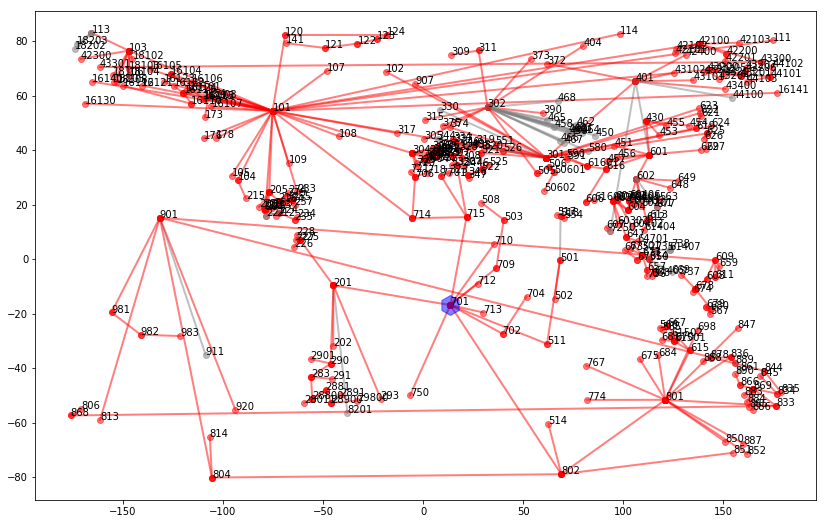

<class 'pygplates.FeatureCollection'>


In [4]:

recon_time = 50

#resolved_polygons = []
#pygplates.resolve_topologies(tp,rotation_model,resolved_polygons,recon_time)

reconstructed_static_polygons = []
pygplates.reconstruct(sp,rotation_model,reconstructed_static_polygons,recon_time)


uniq_plates_from_static_polygons = pt.get_unique_plate_ids_from_reconstructed_features(reconstructed_static_polygons)

reconstruction_tree = rotation_model.get_reconstruction_tree(recon_time)

chains = pt.get_plate_chains(uniq_plates_from_static_polygons, reconstruction_tree)

print chains


plt.figure(figsize=(14,9))

polygon_centroids = pt.get_polygon_centroids(reconstructed_static_polygons)

for chain in chains:
    # First and last plate IDs in a chain always correspond to a static polygon.
    # So p0 and p1 should not be None.
    p0 = polygon_centroids[chain[0]]
    p1 = polygon_centroids[chain[-1]]

    # More than two plate IDs in a chain means plate circuit from first to last passed though
    # plate IDs that did not have geometries (static polygons) at the recon time.
    if len(chain)==2:
        plt.plot([p0[1],p1[1]],[p0[0],p1[0]],'-ro',linewidth=2,zorder=1,alpha=0.5)
    else:
        plt.plot([p0[1],p1[1]],[p0[0],p1[0]],'-o',color='gray',linewidth=2,zorder=1,alpha=0.5)
    plt.text(p0[1],p0[0],str(chain[0]),zorder=2)

# Find plates closest to root/anchor plate that are in the static polygons.
root_plates = pt.get_root_static_polygon_plate_ids(reconstruction_tree, uniq_plates_from_static_polygons)

for root_plate in root_plates:
    p0 = polygon_centroids[root_plate]
    plt.plot(p0[1],p0[0],'bh',markersize=20,zorder=3,alpha=0.5)
    plt.text(p0[1],p0[0],str(root_plate),zorder=4)

plt.show()


## Example #2
Call the function for a series of times, append the results and save to a file for viewing in GPlates

use same method to generate a file with the line geometries, attributed with the fixed and moving plates (but not as gpml attributes, since we don't want these to be used for reconstructions)

In [3]:

time_step = 1.
times = np.arange(0,201,time_step)

tree_features = None

for recon_time in times:
    
    print 'working on time %0.2f Ma' % recon_time
    
    reconstructed_static_polygons = []
    pygplates.reconstruct(sp,rotation_model,reconstructed_static_polygons,recon_time)

    uniq_plates_from_static_polygons = pt.get_unique_plate_ids_from_reconstructed_features(reconstructed_static_polygons)

    reconstruction_tree = rotation_model.get_reconstruction_tree(recon_time)

    chains = pt.get_plate_chains(uniq_plates_from_static_polygons, reconstruction_tree)

    tree_features = pt.create_hierarchy_features(chains,reconstructed_static_polygons,tree_features,
                                                 valid_time=(recon_time+time_step/2.,recon_time-time_step/2.))

tree_feature_collection = pygplates.FeatureCollection(tree_features)
tree_feature_collection.write('test.gpmlz')


working on time 0.00 Ma
working on time 1.00 Ma
working on time 2.00 Ma
working on time 3.00 Ma
working on time 4.00 Ma
working on time 5.00 Ma
working on time 6.00 Ma
working on time 7.00 Ma
working on time 8.00 Ma
working on time 9.00 Ma
working on time 10.00 Ma
working on time 11.00 Ma
working on time 12.00 Ma
working on time 13.00 Ma
working on time 14.00 Ma
working on time 15.00 Ma
working on time 16.00 Ma
working on time 17.00 Ma
working on time 18.00 Ma
working on time 19.00 Ma
working on time 20.00 Ma
working on time 21.00 Ma
working on time 22.00 Ma
working on time 23.00 Ma
working on time 24.00 Ma
working on time 25.00 Ma
working on time 26.00 Ma
working on time 27.00 Ma
working on time 28.00 Ma
working on time 29.00 Ma
working on time 30.00 Ma
working on time 31.00 Ma
working on time 32.00 Ma
working on time 33.00 Ma
working on time 34.00 Ma
working on time 35.00 Ma
working on time 36.00 Ma
working on time 37.00 Ma
working on time 38.00 Ma
working on time 39.00 Ma
working on

In [6]:
reload(pt)

MODELDIR = '/Applications/GPlates-2.0.0/SampleData/FeatureCollections/'
GPML_List = ['%s/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz' % MODELDIR,\
             '%s/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz' % MODELDIR,\
             '%s/DynamicPolygons/Matthews_etal_GPC_2016_TopologyBuildingBlocks.gpmlz' % MODELDIR]
topology_features = pygplates.FeatureCollection()
for file in GPML_List:
    topology_feature = pygplates.FeatureCollection(file)
    topology_features.add(topology_feature)


time_step = 1.
times = np.arange(0,201,time_step)

tree_features = None

for recon_time in times:
    
    print 'working on time %0.2f Ma' % recon_time
    
    resolved_topologies = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, recon_time)

    uniq_plates_from_plate_polygons = pt.get_unique_plate_ids_from_reconstructed_features(resolved_topologies)
    #print uniq_plates_from_plate_polygons
    #break

    reconstruction_tree = rotation_model.get_reconstruction_tree(recon_time)

    chains = pt.get_plate_chains(uniq_plates_from_plate_polygons, reconstruction_tree)

    tree_features = pt.create_hierarchy_features(chains,resolved_topologies,tree_features,
                                                 valid_time=(recon_time+time_step/2.,recon_time-time_step/2.))

tree_feature_collection = pygplates.FeatureCollection(tree_features)
tree_feature_collection.write('test2.gpmlz')



working on time 0.00 Ma
working on time 1.00 Ma
working on time 2.00 Ma
working on time 3.00 Ma
working on time 4.00 Ma
working on time 5.00 Ma
working on time 6.00 Ma
working on time 7.00 Ma
working on time 8.00 Ma
working on time 9.00 Ma
working on time 10.00 Ma
working on time 11.00 Ma
working on time 12.00 Ma
working on time 13.00 Ma
working on time 14.00 Ma
working on time 15.00 Ma
working on time 16.00 Ma
working on time 17.00 Ma
working on time 18.00 Ma
working on time 19.00 Ma
working on time 20.00 Ma
working on time 21.00 Ma
working on time 22.00 Ma
working on time 23.00 Ma
working on time 24.00 Ma
working on time 25.00 Ma
working on time 26.00 Ma
working on time 27.00 Ma
working on time 28.00 Ma
working on time 29.00 Ma
working on time 30.00 Ma
working on time 31.00 Ma
working on time 32.00 Ma
working on time 33.00 Ma
working on time 34.00 Ma
working on time 35.00 Ma
working on time 36.00 Ma
working on time 37.00 Ma
working on time 38.00 Ma
working on time 39.00 Ma
working on